## a.Use the full data set to perform a logistic regression.  Compute the confusion matrix and overall fraction of correct predictions and print a summary. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cmap

#importing Data
data = pd.read_csv('Default.csv')
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


**Preprocessing**


In [2]:
# preprocessing categorical values to numerical values

le=LabelEncoder()
data['default']=le.fit_transform(data['default'])
data['student']=le.fit_transform(data['student'])
data.head(10)

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879
5,0,1,919.588530,7491.558572
6,0,0,825.513331,24905.226578
7,0,1,808.667504,17600.451344
8,0,0,1161.057854,37468.529288
9,0,0,0.000000,29275.268293


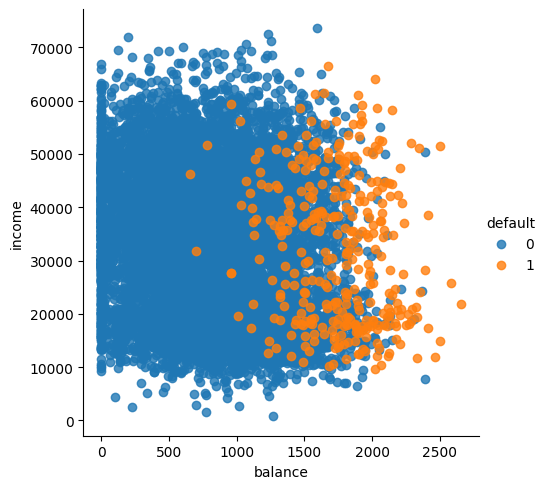

In [3]:
sns.lmplot(x='balance', y='income',hue='default', data=data, fit_reg=False, aspect=1)

**Logistic Regression**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix: 
 [[2525  381]
 [  11   83]]


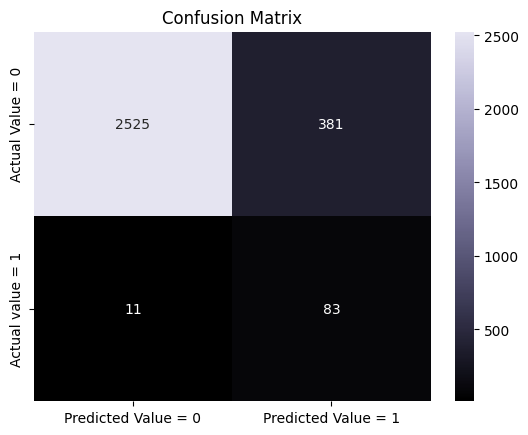

Accuracy Score: 86.93333333333332
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.87      0.93      2906
           1       0.18      0.88      0.30        94

    accuracy                           0.87      3000
   macro avg       0.59      0.88      0.61      3000
weighted avg       0.97      0.87      0.91      3000



In [6]:
logreg = LogisticRegression(class_weight='balanced')
x=data['balance']
y=data['default']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

lreg = logreg.fit(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1))
y_train_pred = lreg.predict(x_train.values.reshape(-1,1))
y_test_pred = lreg.predict(x_test.values.reshape(-1,1))

conf = metrics.confusion_matrix(y_test,y_test_pred)
print('Confusion Matrix:','\n',conf)
cmap=sns.cubehelix_palette(40,hue=0.5,dark=0.9,light=0,rot=0,as_cmap=True)

sns.heatmap(conf,annot=True,fmt='d',cmap=cmap,yticklabels=['Actual Value = 0','Actual value = 1'],xticklabels=['Predicted Value = 0','Predicted Value = 1'])
plt.title('Confusion Matrix')
plt.show()

#Metric Scores
acc_score = metrics.accuracy_score(y_test,y_test_pred)
print('Accuracy Score:',100*acc_score)

class_report = metrics.classification_report(y_test,y_test_pred)
print('Classification Report:','\n',class_report)

 **INFERENCE OF CONFUSION MATRIX**

 *   In the above logistic regression model, the model has predicted 2525 instances of default = 0 correctly(True Negative), 381 instances of default = 0 is wrongly predicted as default = 1(False positive), 11 instances of default = 1 is wrongly predicted as default = 0(False Negative) and 83 instances of default = 1 correctly(True Positive).



*   Overall, the model has an accuracy of 86% in predicting the default values. From the above summary we could see that the model has high sensitivity of 100% in predicting the default = 0 but when when it comes to predicting the values of default = 1 it has low sensitivity of 18%.

## b.Repeat-a using LDA

Confusion Matrix: 
 [[2900    6]
 [  76   18]]


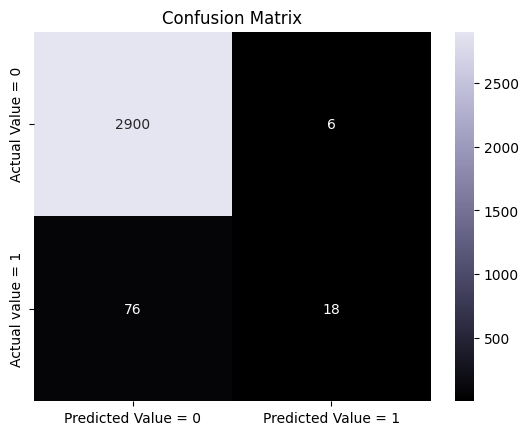

Accuracy Score: 97.26666666666667
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2906
           1       0.75      0.19      0.31        94

    accuracy                           0.97      3000
   macro avg       0.86      0.59      0.65      3000
weighted avg       0.97      0.97      0.96      3000



In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

data.head()
x_LDA = data.drop('default',axis=1)
y_LDA=data['default']

xtrain,xtest,ytrain,ytest=train_test_split(x_LDA,y_LDA,test_size=0.3,random_state=42)
lda=LinearDiscriminantAnalysis()
lida = lda.fit(xtrain,ytrain)
ytrain_pred = lida.predict(xtrain)
ytest_pred = lida.predict(xtest)

conf = metrics.confusion_matrix(ytest,ytest_pred)
print('Confusion Matrix:','\n',conf)
cmap=sns.cubehelix_palette(40,hue=0.5,dark=0.9,light=0,rot=0,as_cmap=True)
sns.heatmap(conf,annot=True,fmt='d',cmap=cmap,yticklabels=['Actual Value = 0','Actual value = 1'],xticklabels=['Predicted Value = 0','Predicted Value = 1'])
plt.title('Confusion Matrix')
plt.show()

#Metric Scores
acc_score = metrics.accuracy_score(ytest,ytest_pred)
print('Accuracy Score:',100*acc_score)

class_report = metrics.classification_report(ytest,ytest_pred)
print('Classification Report:','\n',class_report)


 **INFERENCE OF CONFUSION MATRIX**

 *   When compared to Logistic Regression, the LDA model has predicted 2900 instances of default = 0 correctly(True Negative), 6 instances of default = 0 is wrongly predicted as default = 1(False positive), 76 instances of default = 1 is wrongly predicted as default = 0(False Negative) and 18 instances of default = 1 correctly(True Positive).



*   Overall, the model has an accuracy of 97% in predicting the default values.From the above summary we could see that the model has high sensitivity of 100% in predicting the default = 0 but when when it comes to predicting the values of default = 1 it has low sensitivity of 19%.**LDA has better overall accuracy in predicting the default when compared to Logistic Regression**



Metric Score

#c. Repeat-a using QDA

Confusion Matrix: 
 [[2896   10]
 [  72   22]]


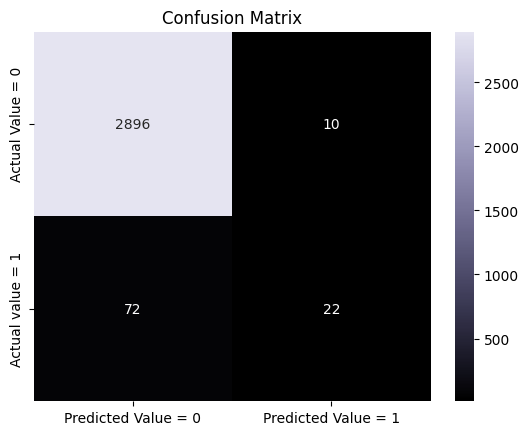

Accuracy Score: 97.26666666666667
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2906
           1       0.69      0.23      0.35        94

    accuracy                           0.97      3000
   macro avg       0.83      0.62      0.67      3000
weighted avg       0.97      0.97      0.97      3000



In [8]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as Quad


x_QDA = data.drop('default',axis=1)
y_QDA=data['default']

xtrain,xtest,ytrain,ytest=train_test_split(x_QDA,y_QDA,test_size=0.3,random_state=42)
qda=Quad()
qida = qda.fit(xtrain,ytrain)
ytrain_pred = qida.predict(xtrain)
ytest_pred = qida.predict(xtest)

conf = metrics.confusion_matrix(ytest,ytest_pred)
print('Confusion Matrix:','\n',conf)
cmap=sns.cubehelix_palette(40,hue=0.5,dark=0.9,light=0,rot=0,as_cmap=True)
sns.heatmap(conf,annot=True,fmt='d',cmap=cmap,yticklabels=['Actual Value = 0','Actual value = 1'],xticklabels=['Predicted Value = 0','Predicted Value = 1'])
plt.title('Confusion Matrix')
plt.show()


#Metric Scores
acc_score = metrics.accuracy_score(ytest,ytest_pred)
print('Accuracy Score:',100*acc_score)

class_report = metrics.classification_report(ytest,ytest_pred)
print('Classification Report:','\n',class_report)

 **INFERENCE OF CONFUSION MATRIX**

 *   When compared to Logistic Regression, the QDA model has predicted 2896 instances of default = 0 correctly(True Negative), 10 instances of default = 0 is wrongly predicted as default = 1(False positive), 72 instances of default = 1 is wrongly predicted as default = 0(False Negative) and 22 instances of default = 1 correctly(True Positive).



*   Overall, the model has an accuracy of 97% in predicting the default values.From the above summary we could see that the model has high sensitivity of 98% in predicting the default = 0 but when when it comes to predicting the values of default = 1 it has low sensitivity of 69%.**QDA has better overall accuracy in predicting the default when compared to Logistic Regression but not as accurate as LDA**


*   **(LDA > QDA > LOGISTIC REGRESSION)**





#d.) Repeat (a) using KNN with K = 1

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Confusion Matrix: 
 [[2841   65]
 [  62   32]]


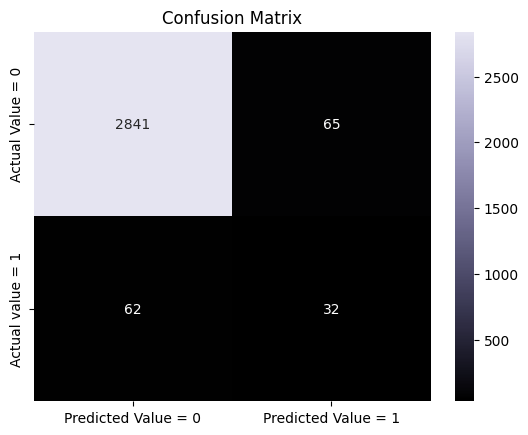

Accuracy Score: 95.76666666666667
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2906
           1       0.33      0.34      0.34        94

    accuracy                           0.96      3000
   macro avg       0.65      0.66      0.66      3000
weighted avg       0.96      0.96      0.96      3000



In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1))
y_test_pred = knn.predict(x_test.values.reshape(-1,1))

conf = metrics.confusion_matrix(y_test,y_test_pred)
print('Confusion Matrix:','\n',conf)
cmap=sns.cubehelix_palette(40,hue=0.5,dark=0.9,light=0,rot=0,as_cmap=True)
sns.heatmap(conf,annot=True,fmt='d',cmap=cmap,yticklabels=['Actual Value = 0','Actual value = 1'],xticklabels=['Predicted Value = 0','Predicted Value = 1'])
plt.title('Confusion Matrix')
plt.show()


#Metric Scores
acc_score = metrics.accuracy_score(y_test,y_test_pred)
print('Accuracy Score:',100*acc_score)

class_report = metrics.classification_report(y_test,y_test_pred)
print('Classification Report:','\n',class_report)

#e.) Repeat (a) using Naive Bayes

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix: 
 [[2897    9]
 [  72   22]]


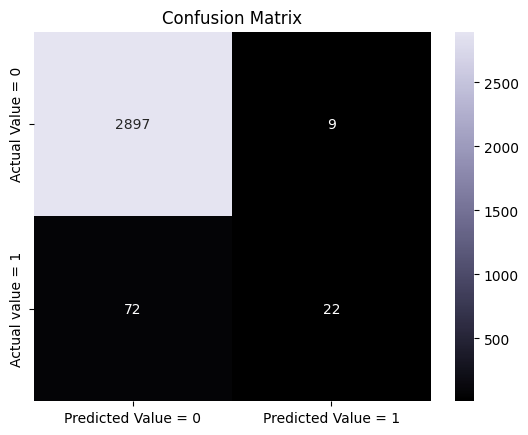

Accuracy Score: 97.3
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2906
           1       0.71      0.23      0.35        94

    accuracy                           0.97      3000
   macro avg       0.84      0.62      0.67      3000
weighted avg       0.97      0.97      0.97      3000



In [18]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(x_train.values.reshape(-1,1),y_train.values.reshape(-1,1))

y_test_pred = gnb.predict(x_test.values.reshape(-1,1))


conf = metrics.confusion_matrix(y_test,y_test_pred)
print('Confusion Matrix:','\n',conf)
cmap=sns.cubehelix_palette(40,hue=0.5,dark=0.9,light=0,rot=0,as_cmap=True)
sns.heatmap(conf,annot=True,fmt='d',cmap=cmap,yticklabels=['Actual Value = 0','Actual value = 1'],xticklabels=['Predicted Value = 0','Predicted Value = 1'])
plt.title('Confusion Matrix')
plt.show()


#Metric Scores
acc_score = metrics.accuracy_score(y_test,y_test_pred)
print('Accuracy Score:',100*acc_score)

class_report = metrics.classification_report(y_test,y_test_pred)
print('Classification Report:','\n',class_report)


Based on the provided accuracy scores and confusion matrices, **Linear Discriminant Analysis** (LDA) delivers superior performance, achieving an accuracy of **97%** and showing a balance between true positives and true negatives. While alternative methods such as Quadratic Discriminant Analysis (QDA) and K-Nearest Neighbors (KNN) also show decent accuracies, LDA stands out with its optimal predictive capabilities.